<a href="https://colab.research.google.com/github/thekaszsz/ML_book/blob/main/ML_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    random_state = 0,
    n_features = 2,
    centers = 2,
    cluster_std = 1,
    n_samples = 300
)

In [35]:
import pandas as pd

df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


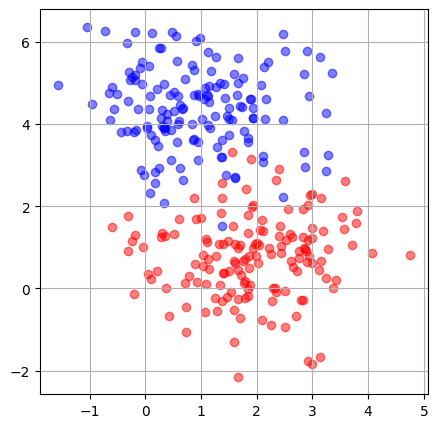

In [36]:
import matplotlib.pyplot as plt

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]

plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.grid()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

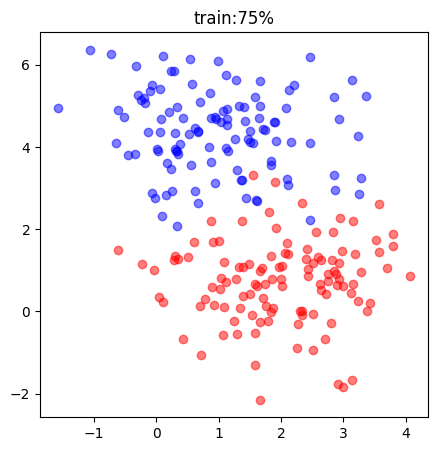

In [38]:
df = pd.DataFrame(X_train)
df['target'] = y_train

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
plt.figure(figsize =(5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.title('train:75%')
plt.show()

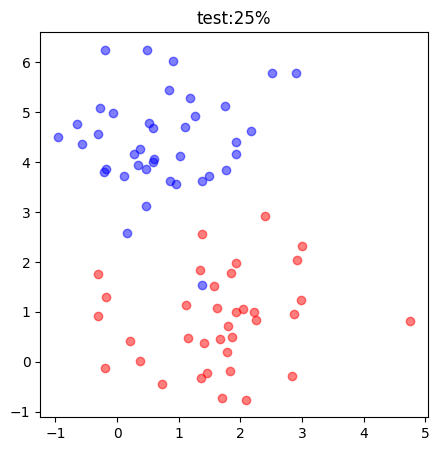

In [39]:
df = pd.DataFrame(X_test)
df['target'] = y_test

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
plt.figure(figsize =(5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.title('test:25%')
plt.show()

In [40]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)

SVC()

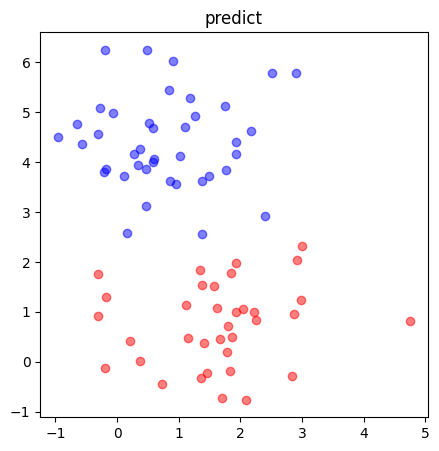

In [41]:
pred = model.predict(X_test)
df = pd.DataFrame(X_test)
df['target'] = pred

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]

plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.title('predict')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('정답률:', score*100,'%')

정답률: 96.0 %


In [43]:
pred = model.predict([[1, 3]])
print('1,3 =',pred)

1,3 = [0]


In [44]:
pred = model.predict([[1, 2]])
print('1,2 =',pred)

1,2 = [1]


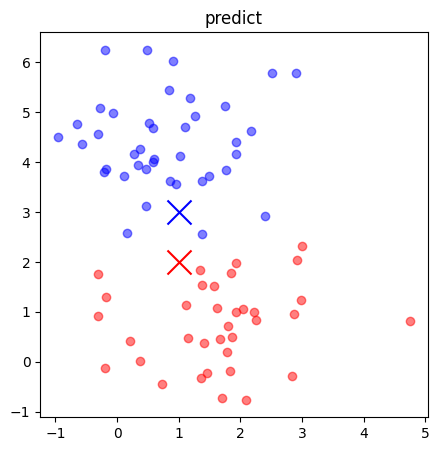

In [45]:
plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = 'b', alpha = 0.5)
plt.scatter(df1[0], df1[1], color = 'r', alpha = 0.5)
plt.scatter([1],[3], color = 'b', marker = 'x', s = 300)
plt.scatter([1],[2], color = 'r', marker = 'x', s = 300)
plt.title('predict')
plt.show()

<ipython-input-46-c9ca2d67f4a1>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i+1)


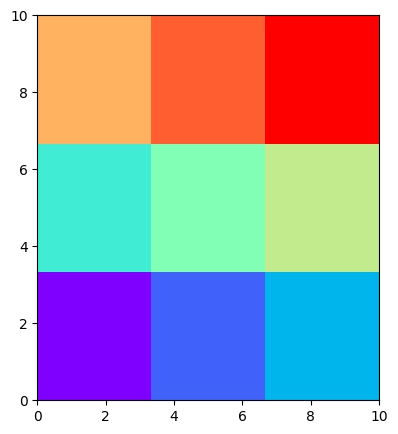

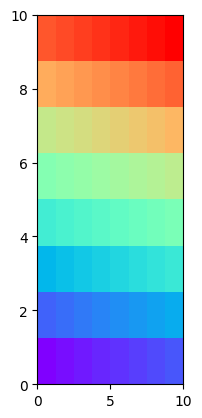

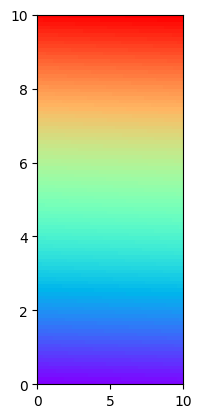

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize = (15,5))

#pcolormesh를 사용하면 표시 범위를 분할해서 색칠할 수 있다
#3x3, 8x8, 100x100으로 조밀할 수록 매끄럽게 칠해진다
sizelist = [3,8,100]
for i in range(3):
  size = sizelist[i]
  X, Y = np.meshgrid(np.linspace(0,10,size+1), #점 데이터 작성
                     np.linspace(0,10,size+1))
  C = np.linspace(0,100,size*size).reshape(size, size)
  plt.subplot(1,3,i+1)
  plt.pcolormesh(X, Y, C, cmap = 'rainbow')

  plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 산포도에 분류 상태를 그리는 함수
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 점과 색칠 컬러맵
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))
    # 모델이 있으면 표시 범위의 점을 모두 예측해서 색을 칠한다
    if model:
        # 표시 범위를 조금 넓혀 분할하고, 조사하는 점(200x200)을 준비한다
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # 모든 점의 값을 모델로 예측한다
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #　예측결괏값(0~2)의 색(cmap_fills)으로 칠한다
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        #　경계를 회색으로 칠한다
        plt.contour(XX, YY, pred, colors="gray")
    #　target의 값(0~2)의 색(cmap_dots)으로 점을 그린다
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

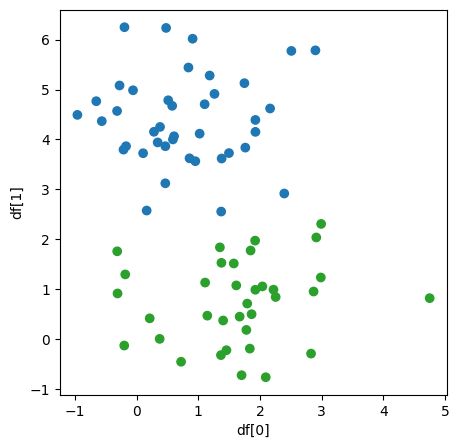

In [59]:
df = pd.DataFrame(X_test)
pred = model.predict(X_test)
plot_boundary(None,df[0],df[1],pred,'df[0]','df[1]')

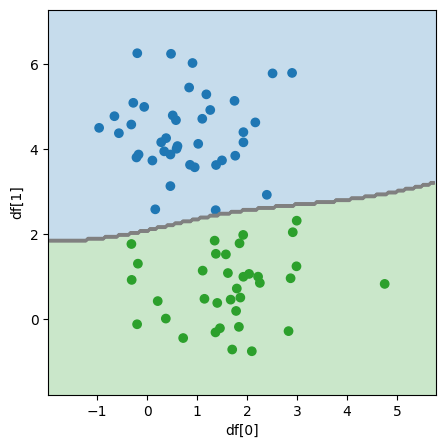

In [60]:
plot_boundary(model,df[0],df[1],pred,'df[0]','df[1]')

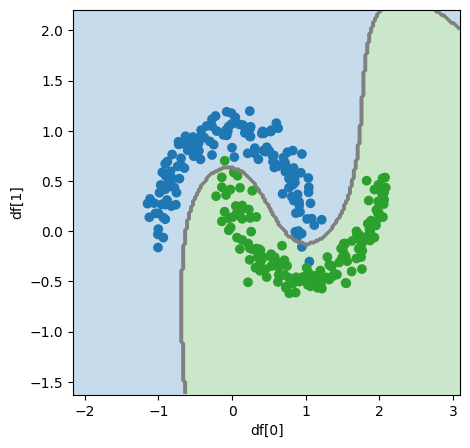

In [61]:
from sklearn.datasets import make_moons
X, y = make_moons(random_state = 3,
                  noise = 0.1,
                  n_samples = 300)
df = pd.DataFrame(X)
model = svm.SVC()
model.fit(X,y)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')

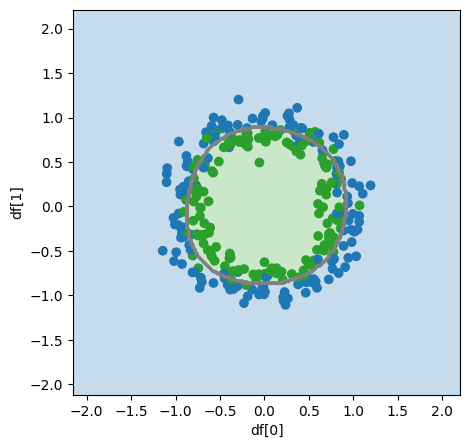

In [62]:
from sklearn.datasets import make_circles
X, y = make_circles(random_state = 3,
                  noise = 0.1,
                  n_samples = 300)
df = pd.DataFrame(X)
model = svm.SVC()
model.fit(X,y)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')